# Car Auction Data Analysis Project

# Section 1: Loading and cleaning the CSV Data File

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Custom KMeans class has been created, and can now be used for clustering
from kmeans import CustomKMeans, plot_clusters

car_df = pd.read_csv("car_prices.csv", low_memory=False)

In [2]:
# First it is important to get an idea of how many null values there are within the dataset
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558836 entries, 0 to 558835
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558836 non-null  int64  
 1   make          548535 non-null  object 
 2   model         548437 non-null  object 
 3   trim          548185 non-null  object 
 4   body          545641 non-null  object 
 5   transmission  493483 non-null  object 
 6   vin           558832 non-null  object 
 7   state         558836 non-null  object 
 8   condition     547042 non-null  object 
 9   odometer      558742 non-null  float64
 10  color         558087 non-null  object 
 11  interior      558087 non-null  object 
 12  seller        558836 non-null  object 
 13  mmr           558836 non-null  object 
 14  sellingprice  558836 non-null  int64  
 15  saledate      558836 non-null  object 
 16  Unnamed: 16   25 non-null      object 
dtypes: float64(1), int64(2), object(14)
memory usage

In [3]:
print(car_df.iloc[:, -1].head(5))

non_null = car_df.iloc[:,-1].dropna()

print(non_null)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Unnamed: 16, dtype: object
417834    Thu May 07 2015 05:01:00 GMT-0700 (PDT)
421288    Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
424160    Thu May 14 2015 05:01:00 GMT-0700 (PDT)
427039    Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
427042    Tue May 26 2015 02:15:00 GMT-0700 (PDT)
434423    Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
444500    Thu May 21 2015 01:30:00 GMT-0700 (PDT)
453793    Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
461596    Thu May 28 2015 05:00:00 GMT-0700 (PDT)
461611    Fri May 29 2015 02:15:00 GMT-0700 (PDT)
492483    Tue Jun 02 2015 05:00:00 GMT-0700 (PDT)
497007    Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
497010    Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
499082    Wed Jun 03 2015 05:59:00 GMT-0700 (PDT)
501454    Thu Jun 11 2015 02:20:00 GMT-0700 (PDT)
505298    Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
505305    Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
520460    Tue Jun 09 2015 05:00:00 GMT-0700 (PDT)
528995    Thu Jun 11 2

In [4]:
#Because the data set is very large we can afford to drop the values that are null
#first we drop the last column because it only contains 25 non nulls
car_df = car_df.drop(car_df.columns[-1], axis = 1)
car_df['condition'] = pd.to_numeric(car_df['condition'], errors='coerce')
car_df = car_df.dropna()

print(car_df.info())

#It seems that the last column might be unnecessary as it is unnamed and mostly filled with null values



<class 'pandas.core.frame.DataFrame'>
Index: 472336 entries, 0 to 558835
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  object 
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 61.3+ MB
None


In [5]:
pd.set_option('display.max_columns', None)

# The saledate column has a format which contains too much information, it is better to convert this to a more standard format.
# An error was encountered due to some dates having years out of normal range
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce', utc=True)
print(car_df['saledate'].isnull().sum())
# Now convert to standard format
car_df['saledate'] = car_df['saledate'].dt.date
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')


print(car_df.head(10))

/var/folders/x3/pm0x9frs2t75134nbzznb8600000gn/T/ipykernel_53718/3266554967.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce', utc=True)


0
   year       make                model                       trim  \
0  2015        Kia              Sorento                         LX   
1  2015        Kia              Sorento                         LX   
2  2014        BMW             3 Series                 328i SULEV   
3  2015      Volvo                  S60                         T5   
4  2014        BMW  6 Series Gran Coupe                       650i   
5  2015     Nissan               Altima                      2.5 S   
6  2014        BMW                   M5                       Base   
7  2014  Chevrolet                Cruze                        1LT   
8  2014       Audi                   A4  2.0T Premium Plus quattro   
9  2014  Chevrolet               Camaro                         LT   

          body transmission                vin state  condition  odometer  \
0          SUV    automatic  5xyktca69fg566472    ca        5.0   16639.0   
1          SUV    automatic  5xyktca69fg561319    ca        5.0    9393.0

## Initial Exploratory Questions

#### We each came up with a few exploratory questions in order to get a better idea of what the data is like that we are working with

In [ ]:
#What is the average selling price?
price_avg = car_df['sellingprice'].mean()
print(f"The average selling price is: {price_avg:.2f}")


In [ ]:
# Get the value counts of 'condition' and sort by ascending order
condition_counts = car_df['condition'].value_counts().sort_index()

# Plot the sorted data
condition_counts.plot(kind='bar', title='Number of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
# What is the number of cars in each state?
car_df['state'].value_counts().plot(kind='bar', title='Number of Cars by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [ ]:
# What is the correlation between odometer and the selling price
car_df_sampled = car_df[car_df['odometer'] < 500000].sample(5000, random_state=50)
# Due to the dataset having about 500,000 rows the plot was too large, so a smaller sample size was used to increase readability
car_df_sampled.plot.scatter(x='odometer', y = 'sellingprice', title = 'Odometer vs Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
# What is the distribution of car ages? 
car_df['car_age'] = 2015 - car_df['year']
car_df['car_age'].hist(bins = 20)
plt.title('Distribution of Car Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# What is the relationship between car age and selling price?
car_df_sampled = car_df.sample(5000, random_state= 50)
car_df_sampled.plot.scatter(x = 'car_age', y = 'sellingprice', title = 'Car Age vs. Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
# What is the average mileage by make?
car_df['sellingprice'].hist(bins = 50)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
color_price = car_df.groupby('color')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
color_price.plot(kind='bar', color='skyblue', width = 0.5)
plt.title('Average Selling Price by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
#Does the condition of the car determine the selling price? 
condition_price = car_df.groupby('condition')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
condition_price.plot(kind = 'bar', color = 'skyblue', width = 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Do states prefer a certain color? 

#heat map of the percentage of colors instead
state_color_counts = car_df.groupby(['state', 'color']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(state_color_counts, cmap='Blues', annot=False, linewidths=0.5)

plt.title('Car Color Counts by State')
plt.xlabel('Car Color')
plt.xticks(rotation=45, ha='right')
plt.ylabel('State')

plt.show()

#### Extra, potentially useful points of data

In [8]:
#What month sells the most cars? 
car_df['month'] = pd.to_datetime(car_df['saledate']).dt.month

most_sales_month = car_df['month'].value_counts().idxmax()
print("the state with the most sales is: ")
print(most_sales_month)
#this needs to be converted to string

#What state has the highest mileage cars sold on average?
highest_mileage_state = car_df.groupby('state')['odometer'].mean().idxmax()
print("the state with the highest mileage cars sold is: ")
print(highest_mileage_state)
#What year car is most common?
most_common_year = car_df['year'].value_counts().idxmax()
print("the most common year is: ")
print(most_common_year)
#What make sells best overall?
best_selling_make = car_df['make'].value_counts().idxmax()
print("the best selling make is: ")
print(best_selling_make)

#What seller makes up the most sales?
top_seller = car_df['seller'].value_counts().idxmax()
print("the top seller is: ")
print(top_seller)

#What is the average condition of the cars? 
average_condition = car_df['condition'].mean()
print("the average condition is: ")
print(average_condition)

# Which states have the highest selling price?
avg_price_by_state = car_df.groupby('state')['sellingprice'].mean().sort_values(ascending = False)
print("Average selling price by state type: ")
print(avg_price_by_state)

# What is the median selling price of cars by state?
median_price_by_state = car_df.groupby('state')['sellingprice'].median().sort_values(ascending= False)
print("Median selling price per state:")
print(median_price_by_state)

# What are the top 5 most common colors?
color_counts = car_df['color'].value_counts().head(5)
print("The top 5 most popular colors are:")
print(color_counts)

# How does the condition affect price?
avg_price_by_condition = car_df.groupby('condition')['sellingprice'].mean()
print('Average selling price by condition:')
print(avg_price_by_condition)

# How many cars are sold each month?
car_df['sale_month'] = car_df['saledate'].dt.month
cars_per_month = car_df['sale_month'].value_counts().sort_index()
print("Number of cars sold each month:")
print(cars_per_month)

# What is the average selling price per car model?
price_avg_by_model = car_df.groupby('model')['sellingprice'].mean().sort_values(ascending=False)
print("The average selling price per car model: ")
print(price_avg_by_model.head(10))

# What are the top 10 most expesnive selling cars?
highest_sellers = car_df.nlargest(10, 'sellingprice')
print(highest_sellers[['make','model', 'sellingprice']])
# Most of these vehicle models make sense, however the ford escape being the highest price does not.


# It can be useful to see the percentage of vehicles that have an automatic transmission
transmission_percent = (car_df['transmission'] == 'automatic').mean()*100
print(f"The percentage of automatic transmission cars is %{transmission_percent:.2f}")
# This can be useful to determine if the non-automatic cars tend to be more or less expensive.

# How many cars have been sold in each year?


cars_per_year = car_df['saledate'].dt.year.value_counts()
print(f"The amount of cars sold in each year is: \n{cars_per_year}")
# Overall a lot more cars were sold in 2015 than 2014

# What is the average price for each car make?
price_avg_by_make = car_df.groupby('make')['sellingprice'].mean()
print("The average selling price for each make is: \n")
for make, price in price_avg_by_make.items():
    print(f"{make}: ${price:,.2f}")
# Rolls-Royce comes out as the most expensive selling make

# What percent of cars were sold in good condition?
good_condition_percent = (car_df['condition'] > 3.0).mean() * 100
print(f"The percent of cars sold in a good condition (> 3.0) is: %{good_condition_percent:.2f}")

# How many cars in the dataset have high mileage (>100,000)?
high_mileage_cars = (car_df['odometer'] > 100000).sum()
print(f"The amount of high mileage cars (miles > 100,000) in the set is: {high_mileage_cars}")


the state with the most sales is: 
2
the state with the highest mileage cars sold is: 
ok
the most common year is: 
2013
the best selling make is: 
Ford
the top seller is: 
ford motor credit company,llc
the average condition is: 
3.4265759967480776
Average selling price by state type: 
state
tn    17285.152896
co    15745.498405
nv    15576.319380
il    15402.065854
mi    15182.068946
ca    14895.258650
mo    14694.777771
oh    14459.130975
fl    14331.417953
wa    14327.867798
mn    14313.545844
wi    14105.263810
pa    14007.944769
nj    13621.127896
tx    13574.509302
ne    13242.496608
ga    12840.065257
ny    12589.252685
ut    12491.601981
hi    12366.514523
az    12168.611403
or    11959.574976
ms    11502.419075
la    11159.715023
in    10959.654550
sc    10747.556473
pr     9755.170993
al     9440.000000
nc     8696.677967
va     8416.433651
md     7713.430892
ok     7448.148148
ma     6787.895249
nm     6479.754601
Name: sellingprice, dtype: float64
Median selling price per s

Running CustomKMeans for k=1
converged at iteration 2


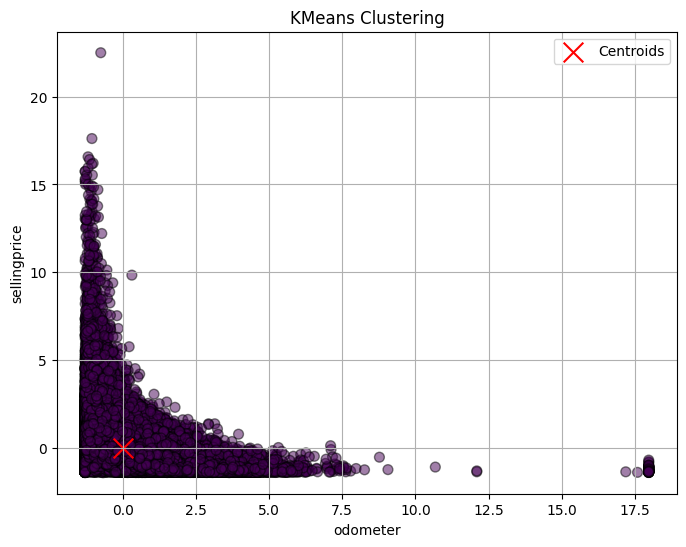

Inertia for k=1: 1889343.9999999995

Running CustomKMeans for k=2
converged at iteration 14


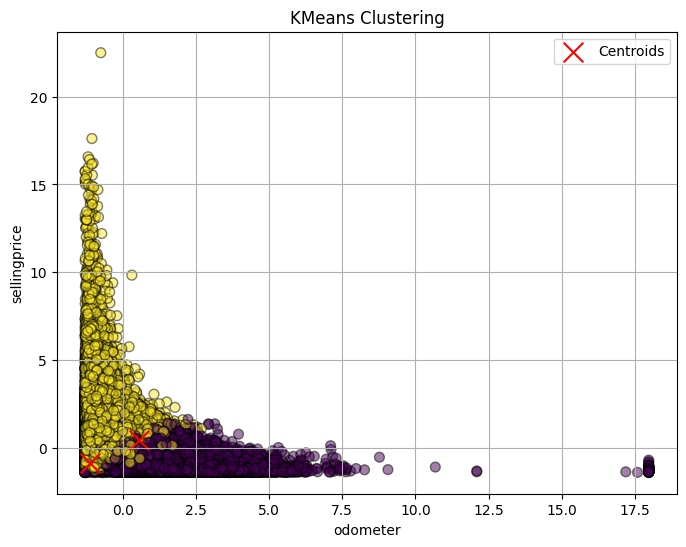

Inertia for k=2: 956009.5326065673

Running CustomKMeans for k=3
converged at iteration 35


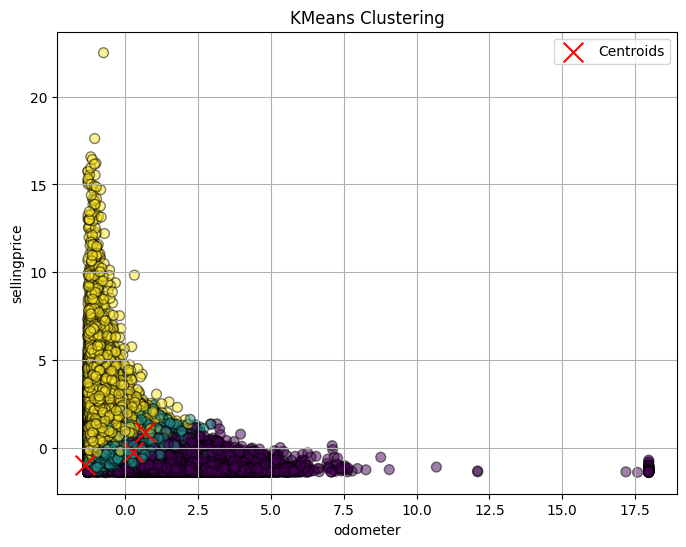

Inertia for k=3: 753950.8686170168

Running CustomKMeans for k=4
converged at iteration 86


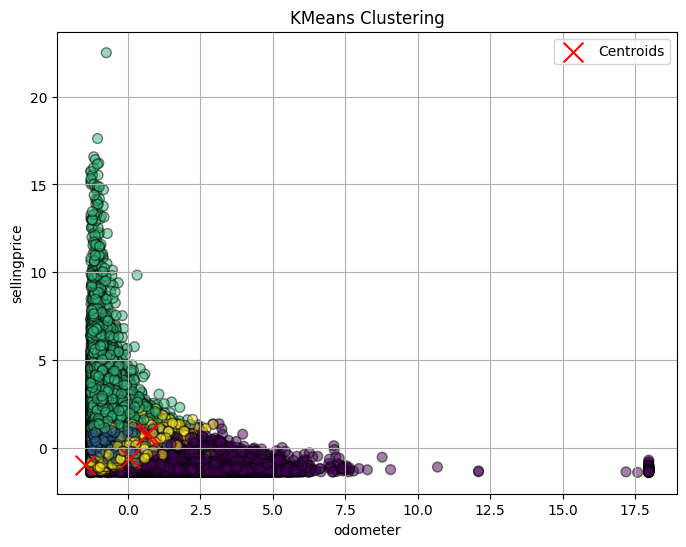

Inertia for k=4: 636452.6939324253

Running CustomKMeans for k=5


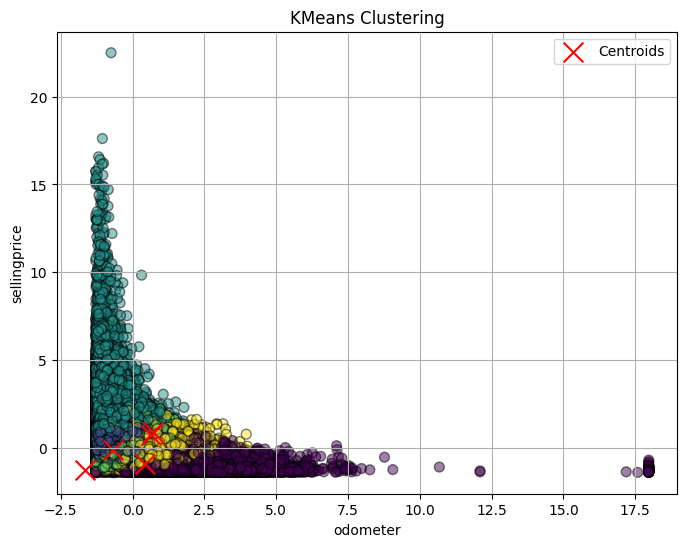

Inertia for k=5: 544110.3912892427



In [10]:
# The clustering can now be carried out using the imported KMeans class
# Clustering can only work using numeric data, therefore only numeric data must be selected
from sklearn.preprocessing import StandardScaler
df = car_df.select_dtypes(include=[np.number])

#When running the data without scaling the values, the centroids are in the same spot with huge inertia values
#Using the standard scaler from sklearn can help the data be more readable
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# The following code uses the CustomKmMeans class in order to create a clustering of odometer and sellingprice
for k in range(1,6):
    print(f"Running CustomKMeans for k={k}")
    kmeans_custom = CustomKMeans(k=k, max_iters=100, tol=1e-4, random_state=42)
    kmeans_custom.fit(df)
    labels = kmeans_custom.predict(df)
    plot_clusters(df, labels, kmeans_custom.centroids, 'odometer', 'sellingprice')
    print(f"Inertia for k={k}: {kmeans_custom.inertia_}\n")

